<a href="https://colab.research.google.com/github/EvoDmiK/TIL/blob/main/AI_study/basic/pytorch/0.basics/0.2.pytorch_geometric_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. 그래프 (Graph)**



## **1-1. 그래프 (Graph)란**
- 그래프(Graph)는 노드와 간선으로 이루어진 구조 
  - 아래 이미지는 G = {{1, 2, 3}, {{1,2}, {2, 3}, {1, 3}}}으로 정의된 그래프이다.   
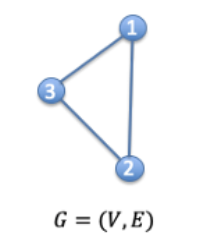

- 수학적으로 그래프 G는 노드 집합 V와 간선 집합 E로 구성된다.
  - 간선 집합 E의 원소 간선 e는 두 개의 노드로 이루어진 순서가 있는 쌍이다.
  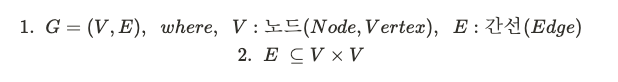

- 두 간선 (a, b)와 (b, a)가 있다고 가정할 때,  
  - 방향성 그래프 (directed graph)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| 두 간선을 같은 것으로 봄.
  - 비방향성 그래프 (undirected graph) | 두 간선을 다른 것으로 봄.  
❗방향성의 그래프를 시각화 할 때, 방향성은 화살표로 표시한다.
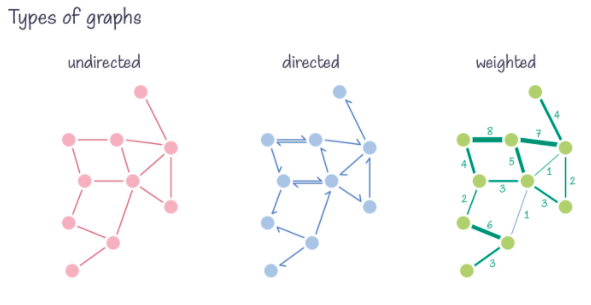

- 그래프는 인접행렬로도 표현할 수 있는데, 그래프가 N개의 노드를 가지고 있다면  
  N x N 인접행렬이 구성된다.  
- 각 노드별 feature의 갯수가 f 개인 경우에는 N x f feature 행렬이 구성된다.

🌱 **e.g.)** G = {{1, 2, 3}, {{1, 2}, {2, 3}, {1,3}}}로 정의되고,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;각각의 노드가 {[1, 1], [0, 1], [1, 0]}의 feature를 가진다고 하면,  
1. 그래프 G의 인접 행렬

|node|1|2|3|
|:--:|:--:|:--:|:--:|
|1|0|1|1|
|2|1|0|1|
|3|1|1|0|

2. 그래프 G의 특성 행렬

|node|feat1|feat2|
|:--|:--|:--|
|node1|1|1|
|node2|0|1|
|node3|1|0|



## **1-2. 그래프를 사용하는 이유**
- 사람들간의 관계, 상호작용같은 추상적인 개념을 다루기에 적합하다.
- 복잡한 문제를 더 간단한 표현으로 단순화하기도 하고, 다른 관점으로도 표현하여 해결할 수 있다.
- 소셜 네트워크, 미디어의 영향, 바이러스 확산 등을 연구, 모델링 할 수 있다.



## **1-3. 그래프를 분석하기 어려운 이유**
1) 유클리드 공간에 존재하지 않아 좌표계에서 그래프를 표현할 수 없다.
  - 우리에게 익숙한 좌표계에서 표현할 수 없어 이미지나 정형데이터보다 분석이 어렵다. 
 
 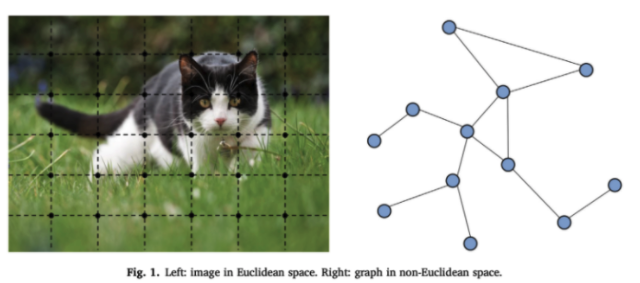

2) 그래프는 고정된 형태로 존재하지 않는다.
  - 동일한 인접행렬을 가진다 해도, 그래프는 무궁무진한 형태로 표현될 수 있다.
  - 아래 두 그래프의 생김새는 달라도 인접행렬은 동일한 것을 볼 수 있다.  
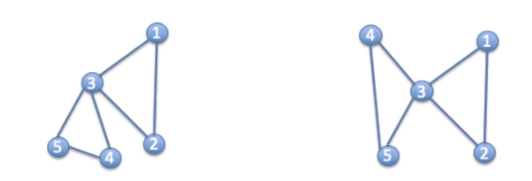

|Node|1|2|3|4|5|
|:--|:--|:--|:--|:--|:--|
|1|0|1|1|0|0|
|2|1|0|1|0|0|
|3|1|1|0|1|1|
|4|0|0|1|0|1|
|5|0|0|1|1|0|

3) 그래프는 사람이 해석할 수 있도록 시각화 하는것이 어렵다.
  - 노드의 개수가 많고 조밀할수혹 그래프를 보고 해석하기 힘들어진다.
  - 아래 예시 이미지만 보아도 무엇이 무엇을 이길 수 있는지 해석하기 힘들다..  


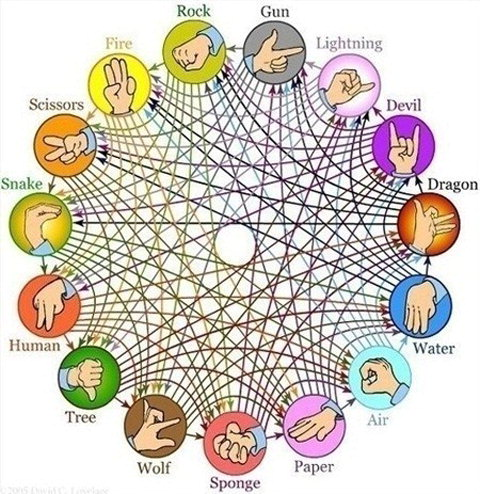

## **1-4. 전통적인 그래프 분석법**
|알고리즘|예시|
|:--|:--|
|탐색 알고리즘|DFS, BFS 등|
|최단 경로 알고리즘|Dijkstra's Algorithm, Nearest Neighbour|
|최소 신장 트리 알고리즘|Prim's Algorithm|
|클러스터링 기법|Highly Connected Components, K-means|

- 위 알고리즘들은 적용하기 전 입력 그래프에 대한 사전지식이 필요하다는 한계가 있다.
  - 여러개의 그래프가 있을때 그래프의 정보를 예측하는 것이 불가능하다.
  - 그래프 자체를 연구하는 것이 불가능하다.


# **2. Node Embedding (정점 표현 학습)**

- 그래프의 node들을 벡터화 하는 것을 Node Embedding이라 한다.
- node가 표현되는 vector 공간을 embedding 공간이라한다.
- 비 유클리드 공간에서의 그래프 형태가 아닌, 유클리드 공간에서의  
  벡터로 처리가 가능해져 여러 툴과 프레임워크에서 사용할 수 있게된다.
- 그래프에서의 정점간 유사도를 embedding 공간에서도 보존하는 것을 목표로 한다.
- 두 노드를 각각 u, v라고 하고 embedding된 두 노드를 각각 $z_u$, $z_v$라고 한다면,  
  embedding 공간에서의 유사도는 아래와 같다.  
  $similarity(u, v) \approx z_v^Tz_u$

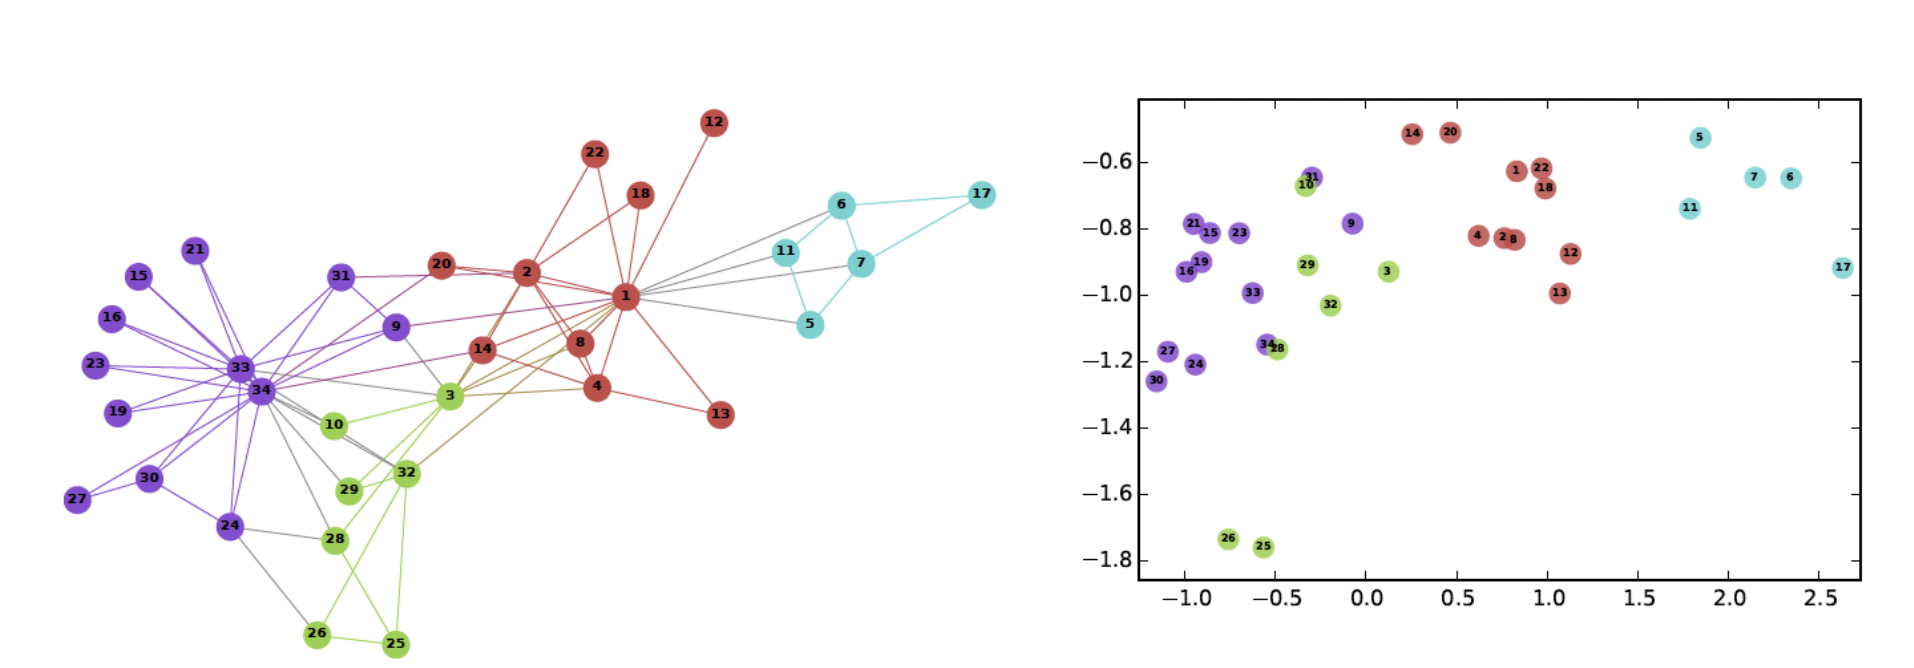


  

## **2-1. Transductive method (변환식 방법)**
  - node 각각에 대한 embedding vector를 얻는 방법
  - 학습의 결과로 정점의 embedding 자체를 얻는다는 특징이 있다.
  - Deepwalk, Node2vec이 대표적인 기법이다.
  - 한계점  
    1) 학습이 진행된 이후 추가된 node에 대해서는 embedding을 얻을 수 없다.  
    2) 모든 node에 대한 embedding을 모두 계산하여 저장해두어야 한다.  
    3) node가 속성(Attribute) 정보를 가진 경우 이를 활용할 수 없다.


## **2-2. Inductive method (귀납식 방법)**
  - 변환식 빙법의 한계를 보완하기 위해 나온 방법으로,  
    각 node를 embedding vector로 변환시키는 encoder 자체를 얻는 방법이다.
  - Latent Factor Model, GNN 등이 대표적인 기법이다.

# **3. Pytorch Geometric (PyG)**
- Graph와 PointCloud, Manifold에 대한 딥러닝을 가능하게 하는 Pytorch 라이브러리
- Graph와 관련된 신경망이 구현되어 있으며, GPU의 고속 활용이 가능하다.

## **3-1. 그래프 데이터 핸들링**

In [1]:
!nvcc -V
!python -V

import torch
torch.__version__

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Python 3.7.15


'1.12.1+cu113'

In [2]:
!pip install torch_geometric
!pip install https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_sparse-0.6.15-cp37-cp37m-linux_x86_64.whl
!pip install https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 4.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=e2e3e2b50e35f2cd5a762741fc466c0b099c06a2dd753e5d45f7f544846beb09
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 5.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 4.8 MB/s 


In [3]:
from torch_geometric.data import Data

- Pytorch Geometric에서 하나의 그래프는 torch_geometric.data.Data라는 클래스로 표현되고, 다음과 같은 속성값들을 갖는다.  
⚠️ 아래의 인자값들은 옵션으로, 자신이 구성하고 싶은 속성을 다양하게 모델링 할 수 있다.

|인자값|설명|
|:--|:--|
|x|노드의 특징 행렬|
|edge_index|그래프의 연결성 (인접행렬)|
|edge_attr|엣지 특징 행렬|
|y|target 값|
|pos| 노드 위치 행렬|


- Data를 통해 그래프를 정의하는 방법은 두 가지가 있다.  
  1) $n \times 2$ 형태의 텐서로 정의하는 방법  
  2) (v1, v2) 순서 쌍으로 정의하는 방법  
     -> edge_index를 전치 시킨 후, contiguous() 메소드를 통해 1)번과 같은 형태로 만든다.

- 간단한 예시로 아래 이미지같은 그래프처럼 노드 0, 1, 2로만 구성된 그래프를 만들어보자  
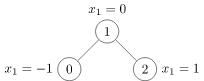

In [4]:
edge_idx = torch.tensor([[0, 1, 1, 2],
                         [1, 0, 2, 1]], dtype = torch.long)

x    = torch.tensor([[-1], [0], [1]], dtype = torch.float)
data = Data(x = x, edge_index = edge_idx)

data

Data(x=[3, 1], edge_index=[2, 4])

In [5]:
## 그래프의 연결 정보. 0 <->1 <-> 2 이렇게 연결되어 있는 그래프이다.
edge_idx = torch.tensor([[0, 1],
                         [1, 0],
                         [1, 2],
                         [2, 1]], dtype = torch.long)

## 노드들의 특징 행렬
x    = torch.tensor([[-1], [0], [1]], dtype = torch.float)
data = Data(x = x, edge_index = edge_idx.t().contiguous()) 

data

Data(x=[3, 1], edge_index=[2, 4])

- torch_geometric.data.Data에서는 그래프와 관련된 유용한 속성과 메소드도 제공한다.
  
|함수명|설명|
|:--|:--|
|data.keys|해당 속성 이름|
|data.num_nodes|총 노드 개수|
|data.num_edges|총 엣지 개수|
|data.num_node_features|노드 특성 개수|
|data.has_isolated_nodes()|고립 노드 여부 확인|
|data.has_self_loops()|셀프 루프 포함 여부 확인|
|data.is_directed()|그래프의 방향성 여부 확인|

In [6]:
print(f'''data keys               : {data.keys} 
number of node features : {data.num_node_features}
number of nodes         : {data.num_nodes} 
number of edges         : {data.num_edges}\n''')

print(f'has isolated nodes? : {data.has_isolated_nodes()}')
print(f'has self loops?     : {data.has_self_loops()}')
print(f'is graph directed?  : {data.is_directed()}')


data keys               : ['edge_index', 'x'] 
number of node features : 1
number of nodes         : 3 
number of edges         : 4

has isolated nodes? : False
has self loops?     : False
is graph directed?  : False


## **3-2. PyG에 있는 데이터 셋을 불러와보자.**
- 많은 딥러닝, 머신러닝 프레임워크에서 공통 벤치마크 데이터 셋이 있는 것처럼,  
  PyG에도 Enzymes같은 Graph, 3d 관련 task에서 사용되는 공통 벤치마크 데이터 셋이 존재한다.

- 그 중 graph regression, classification task에서 사용되는 TUDataset 중, ENZYMES 데이터 셋을 불러와보자
  - ENZYMES 데이터 셋은 600개의 그래프와 총 6개의 레이블, 3개의 node feature로 구성되어 있는 데이터 셋이다.

In [7]:
from torch_geometric.datasets import TUDataset
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
dataset = TUDataset(root = '/tmp/ENZYMES', name = 'ENZYMES')

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [9]:
print(f'length of enzymes dataset : {len(dataset)}')
print(f'number of enzymes classes : {dataset.num_classes}')
print(f'number of node features   : {dataset.num_node_features}')

length of enzymes dataset : 600
number of enzymes classes : 6
number of node features   : 3


In [10]:
def label_distribution(lb_cnt):
  
  plt.bar(lb_cnt.keys(), lb_cnt.values())
  plt.ylim(0, 150)

  for grade, num in lb_cnt.items():
      plt.text(
                  grade, num, num,
                  fontsize = 11, color = 'black',
                  horizontalalignment = 'center',
                  verticalalignment = 'bottom'
              )
  plt.show()

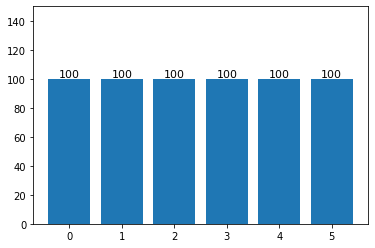

In [11]:
labels    = [data.y.item() for data in dataset]
label_cnt = Counter(labels)

label_distribution(label_cnt)

- Enzymes 데이터 셋중 아무 그래프나 하나 선택해서 시각화해보고, 어떤 특징을 갖는지 확인해 보자
- torch_geometric 형식의 그래프를 matplotlib에서 시각화하기 위해서는 networkx 형태로 변환해 그려줘야 한다.

In [12]:
from torch_geometric.utils import to_networkx
import networkx as nx

In [13]:
## 그래프 시각화 해주는 함수
def visualize_graph(graph):
  plt.figure(figsize = (7, 7))
  plt.xticks([])
  plt.yticks([])

  G = to_networkx(graph, to_undirected = graph.is_undirected())
  nx.draw_networkx(G, pos = nx.spring_layout(G, seed = 0), with_labels = False,  cmap = 'Set2')

  plt.show()

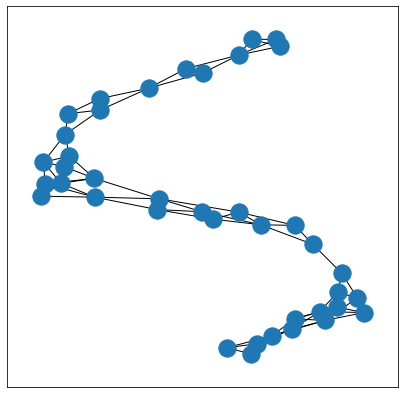

In [14]:
sample_graph = dataset[222]

## 역시 되게 심오하게 생겼다..
visualize_graph(sample_graph)

- 데이터를 확인해 본 결과, 158 / 2 = 79개($\because$ undirected graph)의 edge와  
  40개의 node, 3개의 node feature가 있는 것을 확인하였다.

In [15]:
print(f'sample graph                : {sample_graph}')
print(f'is sample graph undirected? : {sample_graph.is_undirected()}')

sample graph                : Data(edge_index=[2, 158], x=[40, 3], y=[1])
is sample graph undirected? : True


- 데이터 셋을 슬라이싱하여 데이터 셋을 학습용과 시험용으로 분할할 수 있다.  
💬 개인적으로는 scikit-learn의 train_test_split을 활용하는게 제일 익숙하고 편하다..

In [16]:
import torch

length of train dataset : 420
length of test  dataset : 180



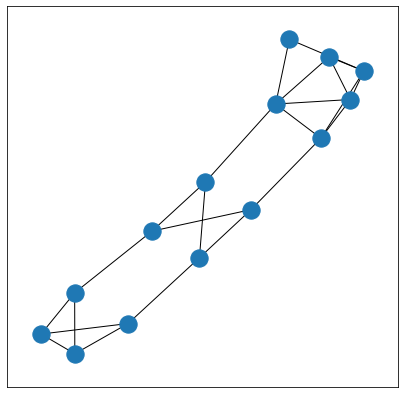

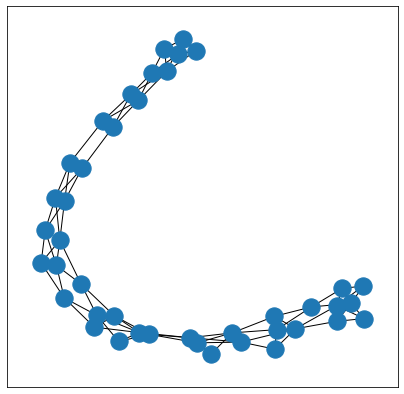

In [17]:
test_size      = int(len(dataset) * 0.3)

test_dataset   = dataset[ : test_size]
train_dataset  = dataset[test_size : ]

print(f'length of train dataset : {len(train_dataset)}')
print(f'length of test  dataset : {len(test_dataset)}\n')

## 공식 홈페이지에서 소개하고 있는 데이터 셋을 셔플 하는 방법은 두 가지가 있다.
shuffled_dataset = dataset.shuffle()
sample_graph     = shuffled_dataset[222]

visualize_graph(sample_graph)

perm = torch.randperm(len(dataset))

shuffled_dataset2 = dataset[perm]
sample_graph      = shuffled_dataset2[222]

visualize_graph(sample_graph)

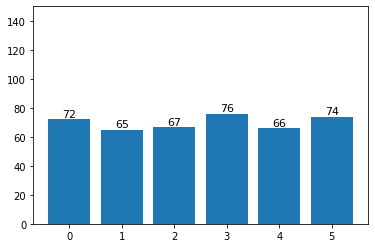

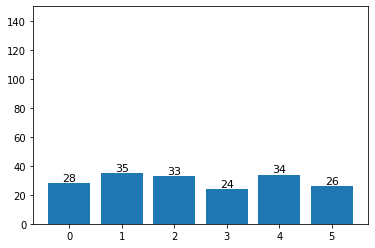

In [22]:
## 하지만 셔플해서 분할했다간... 균등한 데이터 분포라고 하더라도 특정 레이블만 학습용 데이터 셋에 많이 들어갈 수 있다...
shuffled_train = shuffled_dataset[test_size : ]
shuffled_test  = shuffled_dataset[ : test_size]

train_lb_cnt = Counter([lb.y.item() for lb in shuffled_train])
test_lb_cnt  = Counter([lb.y.item() for lb in shuffled_test])

label_distribution(train_lb_cnt)
label_distribution(test_lb_cnt)

In [19]:
## 이번엔 scikit-learn에서 제공하는 방법으로 분할해보자.
from sklearn.model_selection import train_test_split

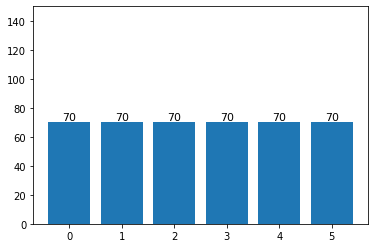

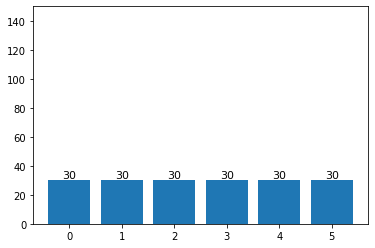

In [21]:
## scikit-learn의 train_test_split에서 stratify 옵션값으로 레이블들을 입력해주면, 레이블의 비율에 맞게 들어간다.
train_graphs, test_graphs = train_test_split(dataset, test_size = 0.3, 
                                              stratify = labels, shuffle = True)

train_lb_cnt = Counter([lb.y.item() for lb in train_graphs])
test_lb_cnt  = Counter([lb.y.item() for lb in test_graphs])

label_distribution(train_lb_cnt)
label_distribution(test_lb_cnt)

## **3-3. 미니 배치(Mini batch)**
- PyG에서는 파이토치와 동일하게 DataLoader를 이용해 데이터 셋을 배치 단위로 나눌 수 있다.

In [57]:
from torch_geometric.data import DataLoader

In [58]:
loader       = DataLoader(train_graphs, batch_size = 16, shuffle = True)
sample_batch = next(iter(loader))

print(f'sample batch                  : {sample_batch}')
print(f'number of sample batch graphs : {sample_batch.num_graphs} ')

sample batch                  : DataBatch(edge_index=[2, 1824], x=[547, 3], y=[16], batch=[547], ptr=[17])
number of sample batch graphs : 16 


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


# **99. 참고자료**
## **99-1. 도서**
## **99-2. 논문, 학술지**
## **99-3. 웹 사이트**

- 아기여우의 자기계발 블로그 : Graph Neural Networks (GNN) / 그래프 뉴럴 네트워크 기초 개념 정리 | [[블로그 링크]](https://littlefoxdiary.tistory.com/16)


- Pytorch-geometric : INTRODUCTION BY EXAMPLE | [[자료 링크]](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#)
- Heath.log : Node Embedding (정점 표현) | [[블로그 링크]](https://velog.io/@dldydldy75/Node-Embedding-%EC%A0%95%EC%A0%90-%ED%91%9C%ED%98%84)
- Doyeon's blog : GNN / Node2Vec and Latent Factor Model | [[블로그 링크]](https://ydy8989.github.io/2021-02-25-node2vec/#%EB%B3%80%ED%99%98%EC%8B%9D-%EB%B0%A9%EB%B2%95%EC%9D%98-%ED%95%9C%EA%B3%84)
- SuperMemi's Study : [CVPR2022 / GML4VC] 5. Pytorch Geometric 이란 무엇인가? | [[블로그 링크]](https://supermemi.tistory.com/189)

## **99-4. 데이터셋 출처**